Unique Values:
 {'Location': 49, 'WindGustDir': 16, 'WindDir9am': 16, 'WindDir3pm': 16}
WindGustDir vs. RainTomorrow:
 RainTomorrow     No   Yes
WindGustDir              
E              7831  1350
ENE            6816  1288
ESE            6172  1200
N              6861  2452
NE             5814  1319
NNE            5067  1481
NNW            4757  1863
NW             5838  2284
S              7151  2017
SE             7685  1733
SSE            7461  1755
SSW            6839  1897
SW             7163  1804
W             15167  5074
WNW            5977  2275
WSW            6984  2085


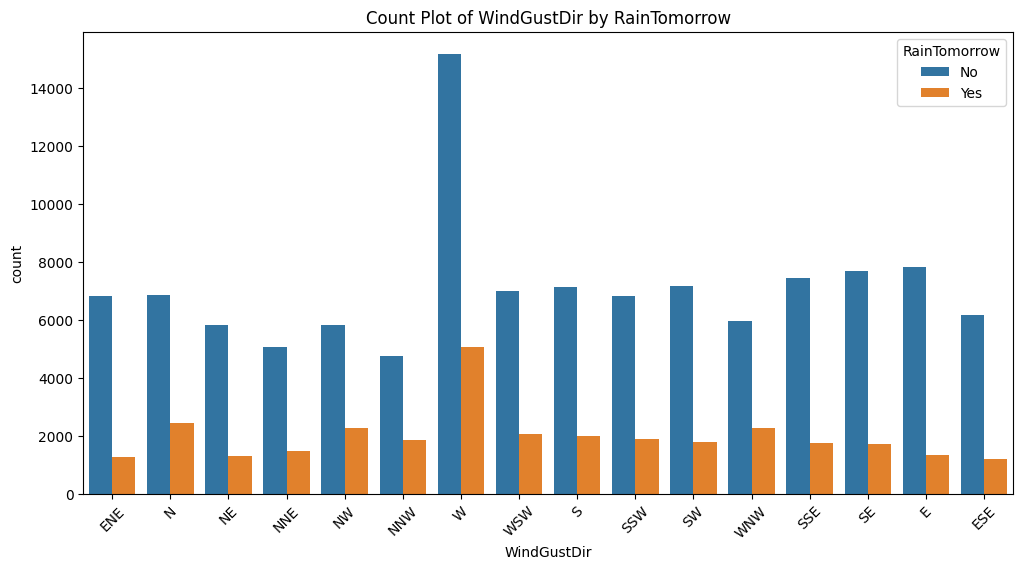

Correlations with Target:
 RainTomorrow     1.000000
Humidity3pm      0.433179
RainToday        0.305744
Cloud3pm         0.298049
Humidity9am      0.251470
Cloud9am         0.249960
Rainfall         0.233900
WindGustSpeed    0.220443
WindSpeed9am     0.086661
WindSpeed3pm     0.084207
Name: RainTomorrow, dtype: float64


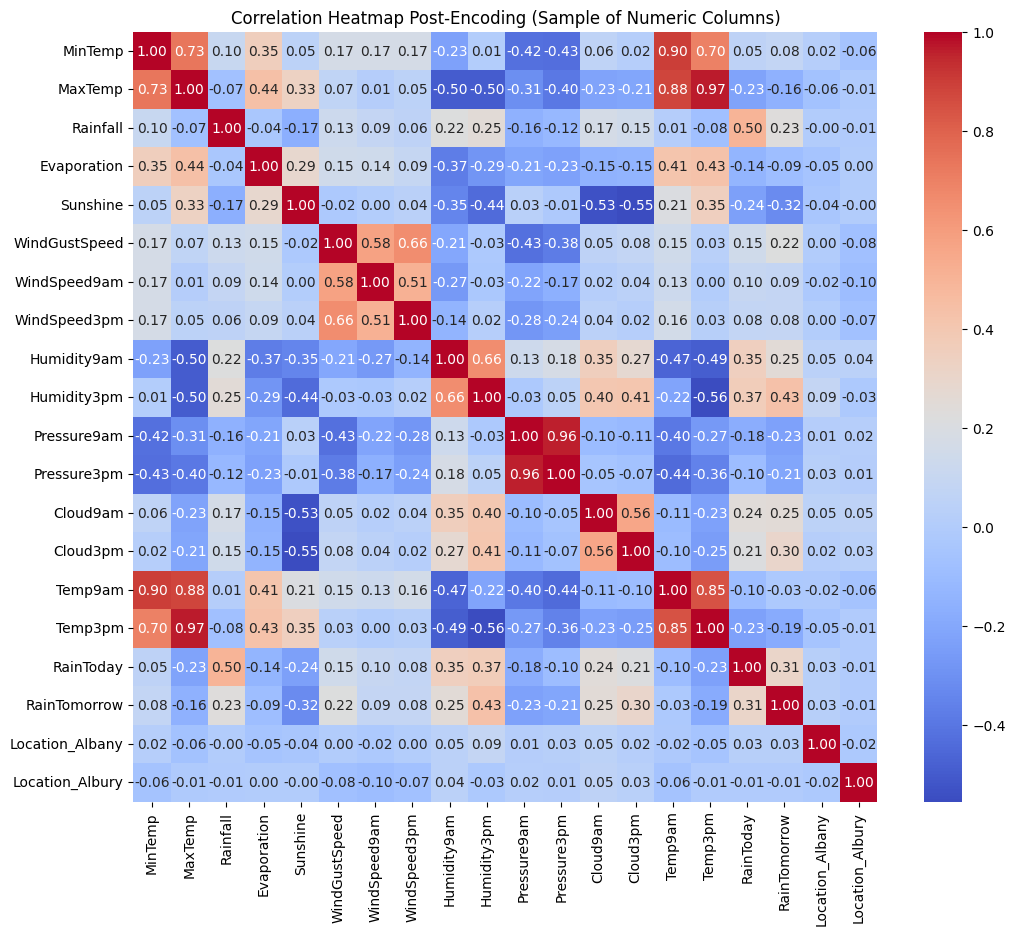

Encoding completed. Data saved as 'encoded_weather_data.csv'


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

#Upload dataset
from google.colab import files
uploaded = files.upload()

# Load the data
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Date Format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


# EDA-Exploratory Data Analysis: Count unique values
categorical_cols = df.select_dtypes(include=['object']).columns.drop(['RainTomorrow', 'RainToday'], errors='ignore')
print("Unique Values:\n", {col: df[col].nunique() for col in categorical_cols})

# Check distribution vs. RainTomorrow
if 'WindGustDir' in df.columns:
    print("WindGustDir vs. RainTomorrow:\n", pd.crosstab(df['WindGustDir'], df['RainTomorrow']))

# Visualizations
if 'WindGustDir' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='WindGustDir', hue='RainTomorrow', data=df)
    plt.title('Count Plot of WindGustDir by RainTomorrow')
    plt.xticks(rotation=45)
    plt.show()

# Preprocessing: Encoding
# Binary for RainToday
if 'RainToday' in df.columns:
    df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

# One-hot for nominal(Specify columns)
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols_names = [col for col in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'] if col in df.columns]

#Execution
if encoded_cols_names:
    encoded_data = encoder.fit_transform(df[encoded_cols_names])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(encoded_cols_names))
   
    df = df.drop(encoded_cols_names, axis=1)
    
    df = pd.concat([df, encoded_df], axis=1)


# Encode target
if 'RainTomorrow' in df.columns:
    df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

# EDA after: Correlation Analysis
if 'RainTomorrow' in df.columns:
    
    df_for_corr = df.drop('Date', axis=1, errors='ignore') 
    corr = df_for_corr.corr()['RainTomorrow'].sort_values(ascending=False)
    print("Correlations with Target:\n", corr.head(10)) # most correlated with the target variable
    #Calculate and display

# Visualizations after
if encoded_cols_names:
    plt.figure(figsize=(12, 10))
    numeric_cols_after_encoding = df.select_dtypes(include=np.number).columns.tolist()
  

    cols_for_heatmap = numeric_cols_after_encoding[:20] # Adjust number as needed

    if cols_for_heatmap:
        sns.heatmap(df[cols_for_heatmap].corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap Post-Encoding (Sample of Numeric Columns)')
        plt.show()
    else:
        print("Not enough numeric columns to display heatmap after encoding.")


# Save the encoded dataframe for the next member
df.to_csv('encoded_weather_data.csv', index=False)
print("Encoding completed. Data saved as 'encoded_weather_data.csv'")